<a href="https://colab.research.google.com/github/ASaragga/ARE/blob/main/FCL01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
using Pkg
Pkg.add(["MonteCarloMeasurements", "Distributions"])

Status `~/.julia/environments/v1.10/Project.toml`
  [79e6a3ab] Adapt v4.3.0
  [336ed68f] CSV v0.10.15
⌃ [052768ef] CUDA v5.7.0
  [a93c6f00] DataFrames v1.7.0
  [31c24e10] Distributions v0.25.118
  [7073ff75] IJulia v1.26.0
  [b2108857] Lux v1.10.0
  [ee78f7c6] Makie v0.22.2
  [0987c9cc] MonteCarloMeasurements v1.4.5
  [91a5bcdd] Plots v1.40.11
⌃ [3c362404] Reactant v0.2.46
  [76a88914] CUDA_Runtime_jll v0.16.1+0
Info Packages marked with ⌃ have new versions available and may be upgradable.


In [7]:
using MonteCarloMeasurements, Distributions, Plots

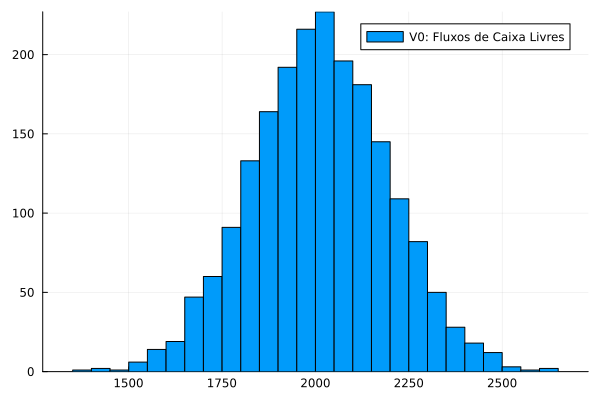

In [14]:
FCL1 = 100 * (1 ± 0.05)   #  Aqui ± representa uma distribuição normal N(0, 0.05)
FCL2 = 115 * (1 ± 0.07)
FCL3 = 130 * (1 ± 0.10)

WACC = 0.09
g = 0.03

V3 = FCL3*(1+g)/(WACC-g)
V0 = FCL1/(1+WACC) + FCL2/(1+WACC)^2 + FCL3/(1+WACC)^3 + V3/(1+WACC)^3


graf01 = plot(V0,label="V0: Fluxos de Caixa Livres")


In [15]:
println("média V0 = ", pmean(V0))
println("desvio-padrão V0 = ", pstd(V0))
println("VaR(5%) V0 = ", pquantile(V0, 0.05))

média V0 = 2012.1763039025893
desvio-padrão V0 = 182.28447643055418
VaR(5%) V0 = 1716.224722967582


In [69]:
function FCL(FC::Real, WACC::Real, g::Real)
    H = length(FC) # Número de fluxos de caixa livres projectados até ao horizonte H

    # Descontando os fluxos de caixa livres até ao horizonte
    FCL_descontados = sum(FC[t] / (1 + WACC)^t for t in 1:H)

    # Valor no Horizonte VH usando uma perpetuidade
    VH = FC[end] * (1 + g) / (WACC - g)
    VH_descontado = VH / (1 + WACC)^n

    # Valor da empresa
    V = FCL_descontados + VH_descontado
    return V
end

FCL (generic function with 2 methods)

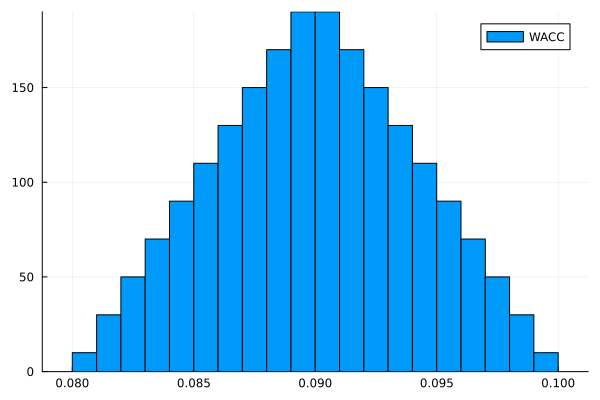

In [70]:
WACC = Particles(2000, TriangularDist(0.08,0.10,0.09))
plot(WACC, label = "WACC")

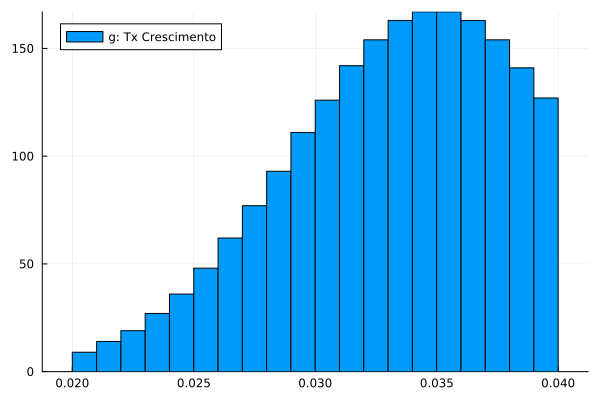

In [71]:
# g <- Distribuição Normal(0.035,0.006) truncada entre 0.02 e 0.04
g = Particles(2000, truncated(Normal(0.035,0.006), 0.02, 0.04))
plot(g, label = "g: Tx Crescimento")

In [72]:
V0 = FCL([FCL1, FCL2, FCL3],WACC,g)

2130.92 ± 294.0 Particles{Float64, 2000}


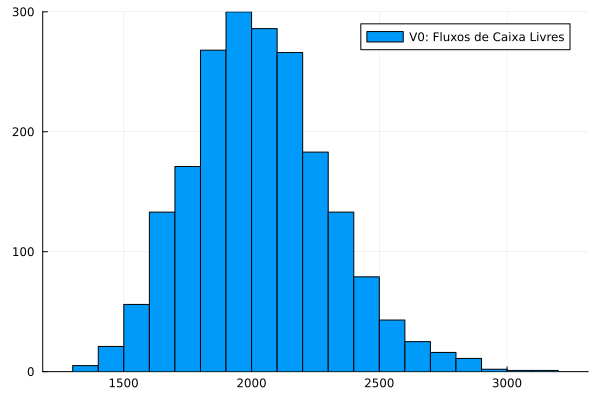

In [67]:
graf02 = plot(V0,label="V0: Fluxos de Caixa Livres")

In [68]:
println("média V0 = ", pmean(V0))
println("desvio-padrão V0 = ", pstd(V0))
println("VaR(5%) V0 = ", pquantile(V0, 0.05))

média V0 = 2031.1853639151113
desvio-padrão V0 = 269.32025826565865
VaR(5%) V0 = 1619.483618789048
